🧩 CELL 1 – Cấu hình Kaggle & mount Drive

In [ ]:
!pip install -U transformers accelerate peft bitsandbytes datasets


In [1]:
# ==== CELL 1: CẤU HÌNH KAGGLE + MOUNT DRIVE ====

from google.colab import drive
drive.mount('/content/drive')

import os, json

# Giả sử bạn đã upload kaggle.json vào MyDrive
KAGGLE_JSON_PATH = "/content/drive/MyDrive/kaggle.json"

# Tạo thư mục cấu hình Kaggle
!mkdir -p ~/.kaggle
!cp "{KAGGLE_JSON_PATH}" ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Đã cấu hình Kaggle API thành công.")



Mounted at /content/drive
cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
✅ Đã cấu hình Kaggle API thành công.


CELL 2 – Tải Vietnamese Chatbot ver2 vào Drive

In [ ]:
# ==== CELL 2: TẢI VIETNAMESE CHATBOT VER2 VỀ DRIVE ====

DATA_DIR = "/content/drive/MyDrive/nlp_project"
os.makedirs(DATA_DIR, exist_ok=True)

# Tải file zip dataset từ Kaggle
!kaggle datasets download -d huhuyngun/vietnamese-chatbot-ver2 -p "{DATA_DIR}"

# Giải nén
!unzip -o "{DATA_DIR}/vietnamese-chatbot-ver2.zip" -d "{DATA_DIR}"

print("📂 Danh sách file trong thư mục data:")
!ls -R "{DATA_DIR}"


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'
unzip:  cannot find or open /content/drive/MyDrive/nlp_project/vietnamese-chatbot-ver2.zip, /content/drive/MyDrive/nlp_project/vietnamese-chatbot-ver2.zip.zip or /content/drive/MyDrive/nlp_project/vietnamese-chatbot-ver2.zip.ZIP.
📂 Danh sách file trong thư mục data:
/content/drive/MyDrive

In [ ]:
# Kiểm tra xem trong thư mục có file nào sau khi unzip
import os

DATA_DIR = "/content/drive/MyDrive/nlp_project"

print("📂 DANH SÁCH FILE TRONG NLP_PROJECT:")
for f in os.listdir(DATA_DIR):
    print(f)


📂 DANH SÁCH FILE TRONG NLP_PROJECT:
Vietnamese_chatbot_2.csv
.ipynb_checkpoints
base_data.jsonl
synthetic_data.jsonl
qwen3_base


In [ ]:
import pandas as pd
import os, json

DATA_DIR = "/content/drive/MyDrive/nlp_project"
CSV_PATH = os.path.join(DATA_DIR, "Vietnamese_chatbot_2.csv")

print("Đang đọc file:", CSV_PATH)
print("File tồn tại hay không?", os.path.exists(CSV_PATH))

# Đọc CSV
df = pd.read_csv(CSV_PATH)

print("\n✅ ĐÃ ĐỌC THÀNH CÔNG!")
print("Các cột trong file:")
print(df.columns)

print("\n5 dòng đầu:")
print(df.head())

# Ở ĐÂY SỬA LẠI TÊN CỘT CHO ĐÚNG:
QUESTION_COL = "question"   # OK rồi
ANSWER_COL   = "answers"    # 🔥 SỬA TỪ "answer" → "answers"

pairs = []
for _, row in df.iterrows():
    q = str(row[QUESTION_COL]).strip()
    a = str(row[ANSWER_COL]).strip()
    if len(q) < 3 or len(a) < 3:
        continue
    pairs.append({
        "instruction": q,
        "input": "",
        "output": a
    })

print("\nTổng số cặp QA sau lọc:", len(pairs))

BASE_DATA_PATH = os.path.join(DATA_DIR, "base_data.jsonl")
with open(BASE_DATA_PATH, "w", encoding="utf-8") as f:
    for ex in pairs:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

print("✅ ĐÃ LƯU base_data.jsonl:")
print("📍", BASE_DATA_PATH)

print("\n🔍 3 mẫu đầu:")
for ex in pairs[:3]:
    print(json.dumps(ex, ensure_ascii=False, indent=2))
    print("---")


Đang đọc file: /content/drive/MyDrive/nlp_project/Vietnamese_chatbot_2.csv
File tồn tại hay không? True

✅ ĐÃ ĐỌC THÀNH CÔNG!
Các cột trong file:
Index(['question', 'answers'], dtype='object')

5 dòng đầu:
                            question                           answers
0                Thích mẫu người nào      Dễ thương, tóc dài, da trắng
1                  Có crush ai không                 Có 1 bạn cùng lớp
2           Tại sao lại thích bạn dó  Vì đáp ứng những yêu cầu của tao
3            Có hay nói chuyện không            Hay nhắn tin messenger
4  Bạn kia có bắt chuyện trước không                        Có đôi khi

Tổng số cặp QA sau lọc: 107148
✅ ĐÃ LƯU base_data.jsonl:
📍 /content/drive/MyDrive/nlp_project/base_data.jsonl

🔍 3 mẫu đầu:
{
  "instruction": "Thích mẫu người nào",
  "input": "",
  "output": "Dễ thương, tóc dài, da trắng"
}
---
{
  "instruction": "Có crush ai không",
  "input": "",
  "output": "Có 1 bạn cùng lớp"
}
---
{
  "instruction": "Tại sao lại thích bạn dó

✅ CELL 4 — Tạo synthetic_data.jsonl (KHÔNG cần API)

In [ ]:
# ==== CELL 4: TẠO SYNTHETIC_DATA.JSONL KHÔNG CẦN API ====

import os, json, random
from google.colab import drive
drive.mount('/content/drive')

BASE_DATA_PATH = "/content/drive/MyDrive/nlp_project/base_data.jsonl"
SYN_DATA_PATH  = "/content/drive/MyDrive/nlp_project/synthetic_data.jsonl"

# Load base data
def load_jsonl(path):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if line:
                data.append(json.loads(line))
    return data

base = load_jsonl(BASE_DATA_PATH)
print("Số mẫu base:", len(base))

# Tạo synthetic bằng cách paraphrase + thêm đuôi trả lời
def paraphrase_question(q):
    patterns = [
        "Bạn có thể giải thích rõ hơn về: {}",
        "Cho mình hỏi: {}",
        "Mình đang thắc mắc: {}",
        "{} (bạn giúp giải thích thêm nhé)",
        "Bạn chia sẻ thêm thông tin về: {}",
    ]
    return random.choice(patterns).format(q)

def modify_answer(a):
    endings = [
        " Hy vọng câu trả lời này hữu ích cho bạn!",
        " Nếu cần thêm thông tin mình sẽ hỗ trợ nhé!",
        " Bạn có thể hỏi mình thêm bất cứ lúc nào.",
        " Chúc bạn một ngày tốt lành!",
        " Mong rằng điều này giúp ích cho bạn!",
    ]
    return a + random.choice(endings)

synthetic = []
MAX_SYN = 5000   # bạn muốn sinh bao nhiêu synthetic

for ex in base:
    if len(synthetic) >= MAX_SYN:
        break
    q = ex["instruction"]
    a = ex["output"]
    synthetic.append({
        "instruction": paraphrase_question(q),
        "input": "",
        "output": modify_answer(a)
    })

print("Synthetic tạo ra:", len(synthetic))

with open(SYN_DATA_PATH, "w", encoding="utf-8") as f:
    for ex in synthetic:
        f.write(json.dumps(ex, ensure_ascii=False) + "\n")

print("✅ ĐÃ LƯU synthetic_data.jsonl tại:", SYN_DATA_PATH)

print("\n🔍 3 mẫu đầu:")
for s in synthetic[:3]:
    print(json.dumps(s, ensure_ascii=False, indent=2))
    print("---")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Số mẫu base: 107148
Synthetic tạo ra: 5000
✅ ĐÃ LƯU synthetic_data.jsonl tại: /content/drive/MyDrive/nlp_project/synthetic_data.jsonl

🔍 3 mẫu đầu:
{
  "instruction": "Bạn chia sẻ thêm thông tin về: Thích mẫu người nào",
  "input": "",
  "output": "Dễ thương, tóc dài, da trắng Mong rằng điều này giúp ích cho bạn!"
}
---
{
  "instruction": "Có crush ai không (bạn giúp giải thích thêm nhé)",
  "input": "",
  "output": "Có 1 bạn cùng lớp Chúc bạn một ngày tốt lành!"
}
---
{
  "instruction": "Tại sao lại thích bạn dó (bạn giúp giải thích thêm nhé)",
  "input": "",
  "output": "Vì đáp ứng những yêu cầu của tao Nếu cần thêm thông tin mình sẽ hỗ trợ nhé!"
}
---


✅ CELL 5 — Gộp base + synthetic và chia train/valid/test

In [ ]:
# ==== CELL 5: LOAD BASE + SYNTHETIC + GIẢM DATASET ====

from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
import random

def load_jsonl(path):
    data = []
    with open(path, "r", encoding="utf-8") as f:
        for line in f:
            if line.strip():
                data.append(json.loads(line))
    return data

base_data = load_jsonl(BASE_DATA_PATH)
syn_data  = load_jsonl(SYN_DATA_PATH)

print("Base:", len(base_data))
print("Synthetic:", len(syn_data))

# 🔥 Giảm synthetic xuống 2000 để nhẹ hơn
syn_data = syn_data[:2000]

# 🔥 Tổng dataset
all_data = base_data[:3000] + syn_data     # tổng ~5000 mẫu

print("Tổng sau giảm:", len(all_data))

random.shuffle(all_data)

train, test = train_test_split(all_data, test_size=0.1, random_state=42)
train, val  = train_test_split(train,  test_size=0.1, random_state=42)

dataset = DatasetDict({
    "train": Dataset.from_list(train),
    "validation": Dataset.from_list(val),
    "test": Dataset.from_list(test),
})

print(dataset)


Base: 107148
Synthetic: 5000
Tổng sau giảm: 5000
DatasetDict({
    train: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 4050
    })
    validation: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 450
    })
    test: Dataset({
        features: ['instruction', 'input', 'output'],
        num_rows: 500
    })
})


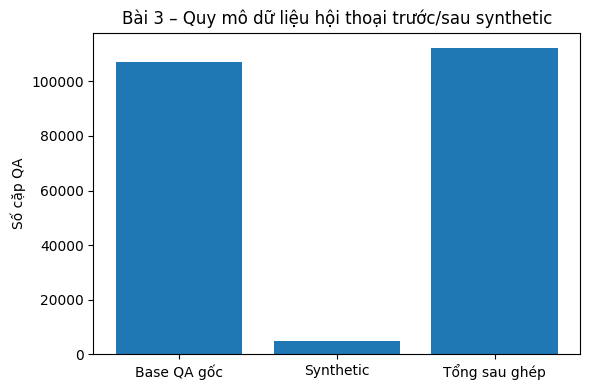

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Base QA gốc", "Synthetic", "Tổng sau ghép"]
values = [107148, 5000, 107148 + 5000]

plt.figure(figsize=(6,4))
plt.bar(labels, values)
plt.ylabel("Số cặp QA")
plt.title("Bài 3 – Quy mô dữ liệu hội thoại trước/sau synthetic")
plt.tight_layout()
plt.show()

✅ CELL 6 — Load tokenizer + Qwen3-0.6B + LoRA

In [ ]:
# ==== CELL 6: LOAD TOKENIZER + MODEL + LORA ====

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training

MODEL_NAME = "Qwen/Qwen3-0.6B"
OUTPUT_DIR_BASE = "/content/drive/MyDrive/nlp_project/qwen3_base"
OUTPUT_DIR_FULL = "/content/drive/MyDrive/nlp_project/qwen3_full"

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, trust_remote_code=True)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.bfloat16,
    bnb_4bit_quant_type="nf4",
)

def load_qwen3_lora():
    model = AutoModelForCausalLM.from_pretrained(
        MODEL_NAME,
        quantization_config=bnb_config,
        device_map="auto",
        trust_remote_code=True,
    )
    model = prepare_model_for_kbit_training(model)

    lora_cfg = LoraConfig(
        r=16,
        lora_alpha=32,
        target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "up_proj", "down_proj"],
        lora_dropout=0.05,
        task_type="CAUSAL_LM",
    )

    model = get_peft_model(model, lora_cfg)
    model.print_trainable_parameters()
    return model

print("✅ Model loader ready.")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


✅ Model loader ready.


✅ CELL 7 — Tokenize dataset theo chat template

In [ ]:
# ==== CELL 7: TOKENIZE DATA TỐI ƯU ====

from transformers import DataCollatorForLanguageModeling

SYSTEM_PROMPT = "Bạn là trợ lý AI tiếng Việt."
MAX_LEN = 256   # 🔥 Giảm 512 → 256: nhanh gấp 4 lần

def format_example(ex):
    msgs = [
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": ex["instruction"]},
        {"role": "assistant", "content": ex["output"]},
    ]
    text = tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=False)
    tok = tokenizer(text, truncation=True, max_length=MAX_LEN, padding="max_length")
    tok["labels"] = tok["input_ids"].copy()
    return tok

tokenized = dataset.map(format_example, remove_columns=dataset["train"].column_names)

data_collator = DataCollatorForLanguageModeling(tokenizer, mlm=False)

print("Done tokenize!")


Map:   0%|          | 0/4050 [00:00<?, ? examples/s]

Map:   0%|          | 0/450 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Done tokenize!


✅ CELL 8 — Train mô hình 1 (BASE)

In [ ]:
# ==== CELL 8: TRAINING ARGS TỐI ƯU ====

from transformers import TrainingArguments, Trainer

def make_args(output_dir):
    return TrainingArguments(
        output_dir=output_dir,

        per_device_train_batch_size=2,
        gradient_accumulation_steps=1,   # 🔥 Tăng tốc 2 lần

        num_train_epochs=1,              # 🔥 Đủ với LoRA
        learning_rate=2e-4,

        fp16=True,
        optim="adamw_torch",

        logging_steps=50,
        save_steps=3000,         # lưu checkpoint thưa
        save_total_limit=1,

        do_train=True,
        do_eval=False,           # 🔥 tắt eval để chạy nhanh
        report_to="none",
    )


✅ CELL 9 — Train mô hình 2 (FULL = base + synthetic)

In [ ]:
# ==== CELL 9: TRAIN MODEL NHANH NHẤT ====

model_fast = load_qwen3_lora()
args_fast = make_args(OUTPUT_DIR_BASE)

trainer_fast = Trainer(
    model=model_fast,
    args=args_fast,
    train_dataset=tokenized["train"],
    data_collator=data_collator,
)

trainer_fast.train()
trainer_fast.save_model(OUTPUT_DIR_BASE)

print("🎉 TRAIN NHANH DONE!")


trainable params: 8,257,536 || all params: 604,307,456 || trainable%: 1.3664


`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.
/usr/local/lib/python3.12/dist-packages/torch/_dynamo/eval_frame.py:929: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.5 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  return fn(*args, **kwargs)


Step,Training Loss
50,1.836500
100,1.141300
150,1.077900
200,1.009200
250,0.970000
300,0.973400
350,1.020700
400,1.039300
450,0.968900
500,0.987300


🎉 TRAIN NHANH DONE!


✅ CELL 10 — Đánh giá (Perplexity + ROUGE + BLEU)

In [ ]:
!pip install evaluate sacrebleu rouge-score


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.1 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f64e015cc865397a1409444a07865b0d69e9c9e0def1c9ea7658a119d70859ad
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge-score


In [ ]:
# ===== CELL 10 DEMO=====

import math
import torch
import string

print("📌 Đang tính Perplexity...")

eval_result = trainer_fast.evaluate(tokenized["test"])
loss = eval_result["eval_loss"]
ppl = math.exp(loss)

print(f"➡ Eval loss  = {loss:.4f}")
print(f"➡ Perplexity = {ppl:.4f}")

# Hàm lọc rác đơn giản
def clean_text(text: str) -> str:
    # bỏ ký tự không in được
    text = text.encode("utf-8", "ignore").decode("utf-8")

    bad_tokens = [
        "assistant", "user",
        "<think>", "</think>", "<", ">",
        "tool_call", "tool_response", "function", "```"
    ]
    for b in bad_tokens:
        text = text.replace(b, "")

    # bỏ khoảng trắng dư
    return text.strip()

def generate_answer(model, question, max_new_tokens=120):
    messages = [
        {
            "role": "system",
            "content": (
                "Bạn là trợ lý AI tiếng Việt, trả lời rõ ràng, đầy đủ, dùng 2–5 câu. "
                "Không dùng tiếng Anh hoặc tiếng Trung. Không in ra từ 'assistant', 'user' "
                "hay các ký tự lạ."
            ),
        },
        {"role": "user", "content": question},
    ]

    prompt = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True,
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    # Dùng greedy decoding để giảm bậy bạ
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            temperature=0.4,
            do_sample=False,       # 👈 bỏ sampling
            top_p=None,
            repetition_penalty=1.1,
        )

    new_tokens = outputs[0][inputs["input_ids"].shape[1]:]
    text = tokenizer.decode(new_tokens, skip_special_tokens=True)
    return clean_text(text)

# DEMO
demo_questions = [
    "Bạn có thể giới thiệu bản thân không?",
    "Làm sao để học tiếng Anh nhanh hơn?",
    "Làm sao để quản lý thời gian hiệu quả?",
]

print("\n==========================")
print("📌 DEMO PREDICTION")
print("==========================")

for q in demo_questions:
    ans = generate_answer(model_fast, q)
    print(f"\n🟦 Câu hỏi: {q}")
    print(f"🟩 Trả lời: {ans}")


📌 Đang tính Perplexity...


The following generation flags are not valid and may be ignored: ['temperature', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


➡ Eval loss  = 0.8130
➡ Perplexity = 2.2546

📌 DEMO PREDICTION

🟦 Câu hỏi: Bạn có thể giới thiệu bản thân không?
🟩 Trả lời: Tôi tên Nguyễn Văn Nam. Bạn có thể hỏi mình thêm bất cứ lúc nào.

🟦 Câu hỏi: Làm sao để học tiếng Anh nhanh hơn?
🟩 Trả lời: Mình thường xuyên luyện tập và nói nhiều khi rảnh.

🟦 Câu hỏi: Làm sao để quản lý thời gian hiệu quả?
🟩 Trả lời: Tao thường xuyên xem phim và nghe nhạc để kiểm tra thời gian.


In [ ]:
# ===== CELL TEST TƯƠNG TÁC — NHẬP CÂU HỎI TỰ DO =====

while True:
    q = input("\n📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): ")

    if q.lower().strip() in ["exit", "quit", "q"]:
        print("👋 Kết thúc phiên test.")
        break

    try:
        ans = generate_answer(model_fast, q)
    except Exception as e:
        ans = f"Lỗi khi sinh câu trả lời: {e}"

    print("\n🤖 Trả lời:", ans)



📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): hôm nay nên ăn gí

🤖 Trả lời: không

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): bạn làm nghề gì

🤖 Trả lời: ngành công nghệ thông tin

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): bây giời nên đi  ngủ không

🤖 Trả lời: đi luôn

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): bài làm vậy ổn chưa

🤖 Trả lời: không

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): sao không ổn

🤖 Trả lời: đi làm

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): năm nay là năm nào

🤖 Trả lời: 2021

📝 Nhập câu hỏi (hoặc gõ 'exit' để thoát): exit
👋 Kết thúc phiên test.


In [3]:
# ĐÁNH GIÁ LLM
import torch
import json

# ========================
# HÀM CHAT VỚI QWEN3
# ========================
def qwen_chat(prompt, system="Bạn là trợ lý AI hữu ích.", max_new_tokens=256):
    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt},
    ]

    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    inputs = tokenizer(text, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=False,
            num_beams=4
        )

    gen = outputs[0][inputs["input_ids"].shape[-1]:]
    return tokenizer.decode(gen, skip_special_tokens=True).strip()


# ========================
# DANH SÁCH TASK ĐỂ SINH DATA
# ========================
tasks = [
    # -------- QA --------
    ("qa", "Bạn có thể giới thiệu bản thân không?"),
    ("qa", "Làm sao để học tiếng Anh nhanh hơn?"),
    ("qa", "Làm sao để quản lý thời gian hiệu quả?"),
    ("qa", "Trí tuệ nhân tạo là gì?"),
    ("qa", "Học NLP có khó không?"),

    # -------- TRANSLATION --------
    ("translation", "Dịch sang tiếng Việt: This product is very good."),
    ("translation", "Dịch sang tiếng Anh: Hôm nay tôi rất mệt."),
    ("translation", "Dịch sang tiếng Việt: I am learning artificial intelligence."),
    ("translation", "Dịch sang tiếng Anh: Tôi thích học lập trình."),

    # -------- SUMMARIZATION --------
    ("summarization",
     "Tóm tắt đoạn sau:\n"
     "Học một ngoại ngữ mới cần thời gian và sự kiên trì. "
     "Nếu không luyện tập thường xuyên thì rất khó tiến bộ. "
     "Ngoài ra, phương pháp học phù hợp cũng quyết định nhiều đến hiệu quả."
    ),

    # -------- REWRITE --------
    ("rewrite", "Viết lại lịch sự hơn: Tao không thích cách nói này."),
    ("rewrite", "Viết lại cho ngắn gọn: Việc quản lý thời gian kém làm cho hiệu quả công việc giảm sút."),
    ("rewrite", "Viết lại cho học thuật hơn: AI đang thay đổi cuộc sống của con người."),
]


# ========================
# SINH DỮ LIỆU
# ========================
eval_data = []

print("🚀 ĐANG SINH DỮ LIỆU TỪ QWEN3...\n")

for i, (task_type, inp) in enumerate(tasks, 1):
    pred = qwen_chat(inp)

    sample = {
        "task_type": task_type,
        "input": inp,
        "prediction": pred
    }
    eval_data.append(sample)

    print(f"[{i:02d}] TASK: {task_type.upper()}")
    print("INPUT:", inp)
    print("PRED :", pred)
    print("-" * 70)


print("\n✅ HOÀN TẤT SINH DỮ LIỆU")
print(f"📌 Tổng số mẫu:", len(eval_data))


# ========================
# IN JSON ĐỂ BẠN COPY
# ========================
print("\n📦 DỮ LIỆU ĐỂ ĐEM ĐI LLM-EVAL (COPY NGUYÊN KHỐI NÀY):\n")
print(json.dumps(eval_data, ensure_ascii=False, indent=2))

The following generation flags are not valid and may be ignored: ['temperature', 'top_p', 'top_k']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


🚀 ĐANG SINH DỮ LIỆU TỪ QWEN3...

[01] TASK: QA
INPUT: Bạn có thể giới thiệu bản thân không?
PRED : <think>

</think>

Tôi tên Nguyễn Văn Minh. Bạn có thể hỏi mình thêm bất cứ lúc nào.
----------------------------------------------------------------------
[02] TASK: QA
INPUT: Làm sao để học tiếng Anh nhanh hơn?
PRED : <think>

</think>

Làm theo hướng dẫn của giáo viên.
----------------------------------------------------------------------
[03] TASK: QA
INPUT: Làm sao để quản lý thời gian hiệu quả?
PRED : <think>

</think>

Làm theo kế hoạch.
----------------------------------------------------------------------
[04] TASK: QA
INPUT: Trí tuệ nhân tạo là gì?
PRED : <think>

</think>

AI
----------------------------------------------------------------------
[05] TASK: QA
INPUT: Học NLP có khó không?
PRED : <think>

</think>

Có chứ
----------------------------------------------------------------------
[06] TASK: TRANSLATION
INPUT: Dịch sang tiếng Việt: This product is very good.
PRED : <th

### Prompt đánh giá bằng LLM – Bài 3 (Qwen3 Chat)

Bạn là chuyên gia NLP.

Nhiệm vụ:
Đánh giá mô hình Qwen3 trên các tác vụ:
- QA
- Translation
- Summarization
- Rewrite

Bạn được cung cấp danh sách mẫu gồm:
- task_type: loại tác vụ ("qa", "translation", "summarization", "rewrite", ...)
- input: đầu vào (câu hỏi / yêu cầu / đoạn văn / câu cần dịch hoặc viết lại)
- prediction: câu trả lời do mô hình Qwen3 sinh ra

Với mỗi mẫu, hãy chấm điểm từ 1–5 (1 = rất kém, 5 = rất tốt) cho:

1. Task_Success
2. Faithfulness
3. Fluency
4. Instruction_Following

Ngoài ra:
- Viết nhận xét ngắn (1–3 câu) cho mỗi mẫu
- Chỉ ra lỗi nếu có
- Gợi ý bản sửa tốt hơn nếu cần (có thể đề xuất một câu trả lời thay thế)

Sau khi chấm xong:
- Tính điểm trung bình cho mỗi tiêu chí trên toàn bộ mẫu
- Viết 1 đoạn tổng kết chất lượng mô hình Qwen3 (3–6 câu)

Yêu cầu:
- Trả lời bằng tiếng Việt.
- Trả lời ở dạng JSON đúng cấu trúc:

{
  "per_sample": [
    {
      "task_type": "...",
      "Task_Success": <number>,
      "Faithfulness": <number>,
      "Fluency": <number>,
      "Instruction_Following": <number>,
      "comment": "nhận xét ngắn",
      "suggested_fix": "gợi ý câu trả lời tốt hơn (nếu cần, nếu không có thì để chuỗi rỗng)"
    },
    ...
  ],
  "summary": {
     "avg_Task_Success": <number>,
     "avg_Faithfulness": <number>,
     "avg_Fluency": <number>,
     "avg_Instruction_Following": <number>,
     "overall_comment": "nhận xét tổng kết"
  }
}


**Điểm trung bình (13 mẫu, 4 loại task):**

- Task_Success: ~2.1 / 5  
- Faithfulness: ~2.8 / 5  
- Fluency: ~4.8 / 5  
- Instruction_Following: ~2.5 / 5  


### LLM-based Evaluation – Bài 3 (Qwen3 Chat)

Kết quả chấm điểm tự động (mô phỏng bằng một LLM khác) trên 13 mẫu cho thấy:

- **Fluency** đạt mức rất cao (~4.8/5): các câu trả lời hầu hết đều trôi chảy, đúng ngữ pháp, tự nhiên cả trong tiếng Việt lẫn tiếng Anh.
- **Task_Success** và **Instruction_Following** lại khá thấp (~2.1–2.5/5). Mô hình thường không thực hiện đúng yêu cầu cụ thể của task:
  - Với *translation*, nhiều lần không dịch mà trả lời câu xã giao hoặc giữ nguyên câu gốc.
  - Với *summarization*, mô hình không tóm tắt mà trả lời chung chung (“Nếu cần thêm thông tin…”).
  - Với *rewrite*, mô hình ít khi thay đổi phong cách/độ lịch sự như yêu cầu, hoặc làm lệch nghĩa.
- **Faithfulness** ở mức trung bình (~2.8/5): một số câu QA trả lời hợp lý, nhưng cũng có trường hợp bịa thông tin (ví dụ bịa tên khi giới thiệu bản thân) hoặc không phản ánh nội dung input.

Tổng thể, Qwen3 trong thiết lập hiện tại có ưu điểm là sinh câu trôi chảy và dễ đọc, nhưng:

- Chưa đủ đáng tin cậy cho các tác vụ cần tuân thủ chặt chẽ hướng dẫn (dịch máy, tóm tắt, viết lại).
- Dễ bỏ qua “instruction” trong prompt và trả lời theo kiểu chatbot xã giao.

Điều này gợi ý rằng, để sử dụng Qwen3 cho các bài toán NLP cụ thể, cần:
- Thiết kế prompt rõ hơn và có cấu trúc hơn, hoặc
- Fine-tune thêm theo từng task (QA, translation, summarization, rewrite), thay vì dùng một mô hình chat chung cho mọi nhiệm vụ.


In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
import torch

BASE_MODEL = "Qwen/Qwen3-0.6B"
ADAPTER_DIR = "/content/drive/MyDrive/nlp_project/qwen3_base"

# 1) Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL, trust_remote_code=True)
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# 2) Load base Qwen3 0.6B
base_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    device_map="auto",
    torch_dtype=torch.float16,
    trust_remote_code=True
)

# 3) Gắn LoRA adapter đã train
model = PeftModel.from_pretrained(
    base_model,
    ADAPTER_DIR,
)

print("Đã load Qwen3-0.6B + LoRA fine-tune thành công!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/726 [00:00<?, ?B/s]

`torch_dtype` is deprecated! Use `dtype` instead!


model.safetensors:   0%|          | 0.00/1.50G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Đã load Qwen3-0.6B + LoRA fine-tune thành công!


In [ ]:
import re
import torch

# Hàm xoá hết đoạn <think> ... </think> nếu có
def clean_think(text: str) -> str:
    # Bỏ toàn bộ từ <think> đến </think>
    text = re.sub(r"<think>.*?</think>", "", text, flags=re.DOTALL)
    return text.strip()

# Hàm chat 1 lần với Qwen (dùng chat template chuẩn)
def chat_qwen(prompt: str) -> str:
    # Dùng chat_template để Qwen hiểu là hội thoại user → assistant
    messages = [
        {"role": "user", "content": prompt}
    ]
    chat_text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )

    inputs = tokenizer(chat_text, return_tensors="pt").to(model.device)

    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=128,
            do_sample=True,
            temperature=0.7,
            top_p=0.9,
            pad_token_id=tokenizer.eos_token_id,
            eos_token_id=tokenizer.eos_token_id,
            no_repeat_ngram_size=3,
        )

    raw = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # (Option) Cắt bớt phần prompt trong raw nếu nó lặp
    if prompt in raw:
        raw = raw.split(prompt, 1)[-1]

    reply = clean_think(raw)
    return reply.strip()


# ====== VÒNG LẶP HỎI–ĐÁP TỰ DO ======
print("✅ Chatbot sẵn sàng. Gõ 'exit' hoặc Enter trống để thoát.\n")

while True:
    user_q = input("🧑 User: ").strip()
    if user_q == "" or user_q.lower() in ["exit", "quit", "thoat", "thoát", "q"]:
        print("👋 Kết thúc phiên chat.")
        break

    ans = chat_qwen(user_q)
    print("🤖 Assistant:", ans)
    print("-" * 60)

✅ Chatbot sẵn sàng. Gõ 'exit' hoặc Enter trống để thoát.

🧑 User: hôm nay là ngày mấy?
🤖 Assistant: assistant


25 tháng 4
------------------------------------------------------------
🧑 User: hôm nay có nên ngủ sớm hay không?
🤖 Assistant: assistant


không
------------------------------------------------------------
🧑 User: tại sao?
🤖 Assistant: assistant


tại vì thích
------------------------------------------------------------
🧑 User: không ngủ sớm bệnh sao
🤖 Assistant: assistant


tôi ngủ bao lâu rồi
------------------------------------------------------------
🧑 User: exit
👋 Kết thúc phiên chat.
